In [1]:
### ACTIONS YOU NEED TO DO ###
# Comments related to the code #


### Make sure to run all cells at the start ###

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error

In [2]:
# importing relevant station files #
from google.colab import files
data_to_load = files.upload()

### Press choose file, then select the file you want ###

Saving Fielding_Lake_1268_clean.csv to Fielding_Lake_1268_clean.csv


In [3]:
import io

### Change below to the filename you need. Not the location, just the name ###
df = pd.read_csv(io.BytesIO(data_to_load['Fielding_Lake_1268_clean.csv']))
### Change the station name and number below ###
station_name = 'Fielding Lake (1268)'

In [4]:
df = df.dropna()

df.head()

,Date,Fielding Lake (1268) Air Temperature Minimum (degC),Fielding Lake (1268) Air Temperature Average (degC),Fielding Lake (1268) Air Temperature Maximum (degC),Fielding Lake (1268) Precipitation Accumulation (mm) Start of Day Values,Fielding Lake (1268) Precipitation Increment - Snow-adj (mm),Fielding Lake (1268) Snow Depth (cm) Start of Day Values,Fielding Lake (1268) Snow Density (pct) Start of Day Values
0,2014-09-06,2.232258,7.580645,12.519355,285.225806,4.580645,2.903226,20.0
1,2014-09-07,2.096774,7.403226,12.409677,288.483871,4.467742,2.903226,20.0
2,2014-09-08,1.941935,7.300000,12.432258,291.677419,4.403226,2.903226,20.0
3,2014-09-09,1.893548,7.212903,12.283871,294.774194,4.661290,3.000000,20.0
4,2014-09-10,2.006452,7.074194,11.961290,298.129032,4.661290,3.000000,20.0


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc1_s = MinMaxScaler(feature_range = (0, 1))
Xs_s = sc1_s.fit_transform(df[[station_name + ' Air Temperature Minimum (degC)', station_name + ' Air Temperature Average (degC)', station_name + ' Air Temperature Maximum (degC)', station_name + ' Snow Depth (cm) Start of Day Values']])
sc2 = MinMaxScaler(feature_range = (0, 1))
Ys = sc2.fit_transform(df[[station_name + ' Snow Depth (cm) Start of Day Values']])

sc1_n = MinMaxScaler(feature_range = (0, 1))
Xs_n = sc1_n.fit_transform(df[[station_name + ' Air Temperature Minimum (degC)', station_name + ' Air Temperature Average (degC)', station_name + ' Air Temperature Maximum (degC)']])

In [6]:
# Each time step uses the previous window to predict the next value
window = 1  # predicting 1 days ahead

X_train_s = []
y_train = []
X_train_n = []
for i in range(window, len(Ys)):
    X_train_s.append(Xs_s[i-window:i,:])
    y_train.append(Ys[i])
    X_train_n.append(Xs_n[i-window:i,:])

X_train_s, y_train = np.array(X_train_s), np.array(y_train)
X_train_n = np.array(X_train_n)

min_date = df['Date'].iloc[window]
date_time_obj = datetime.datetime.strptime(min_date, '%Y-%m-%d')
max_date = date_time_obj + timedelta(days=len(y_train)-1)
time_axis = pd.date_range(start=min_date, end=max_date)

In [7]:
# Shifted 
regressor_s = Sequential()
regressor_s.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_s.shape[1], X_train_s.shape[2])))
regressor_s.add(Dropout(0.2))
regressor_s.add(LSTM(units = 50, return_sequences = True))
regressor_s.add(Dropout(0.2))
regressor_s.add(LSTM(units = 50, return_sequences = True))
regressor_s.add(Dropout(0.2))
regressor_s.add(LSTM(units = 50))
regressor_s.add(Dropout(0.2))
regressor_s.add(Dense(units = 1))
regressor_s.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor_s.fit(X_train_s, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
74/74 [==============================] - 6s 6ms/step - loss: 0.0974
Epoch 2/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0112
Epoch 3/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 4/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 5/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 6/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 7/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0021
Epoch 8/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 9/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0022
Epoch 10/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 11/15
74/74 [==============================] - 0s 6ms/step - loss: 0.0018
Epoch 12/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0016
Epoch 13/15
74/74 [==============================

In [8]:
# Not shifted
regressor_n = Sequential()
regressor_n.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_n.shape[1], X_train_n.shape[2])))
regressor_n.add(Dropout(0.2))
regressor_n.add(LSTM(units = 50, return_sequences = True))
regressor_n.add(Dropout(0.2))
regressor_n.add(LSTM(units = 50, return_sequences = True))
regressor_n.add(Dropout(0.2))
regressor_n.add(LSTM(units = 50))
regressor_n.add(Dropout(0.2))
regressor_n.add(Dense(units = 1))
regressor_n.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor_n.fit(X_train_n, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
74/74 [==============================] - 6s 6ms/step - loss: 0.0982
Epoch 2/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0606
Epoch 3/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0413
Epoch 4/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0379
Epoch 5/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0372
Epoch 6/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0380
Epoch 7/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0383
Epoch 8/15
74/74 [==============================] - 0s 7ms/step - loss: 0.0382
Epoch 9/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0368
Epoch 10/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0387
Epoch 11/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0381
Epoch 12/15
74/74 [==============================] - 1s 7ms/step - loss: 0.0369
Epoch 13/15
74/74 [==============================

In [9]:
y_predict_s = regressor_s.predict(X_train_s)
y_predict_n = regressor_n.predict(X_train_n)

#unscale the output
y_predict_unscaled_s = sc2.inverse_transform(y_predict_s)
y_train_unscaled = sc2.inverse_transform(y_train)
y_predict_unscaled_n = sc2.inverse_transform(y_predict_n)

Text(0.5, 1.0, 'Fielding Lake (1268) Snow Depth')

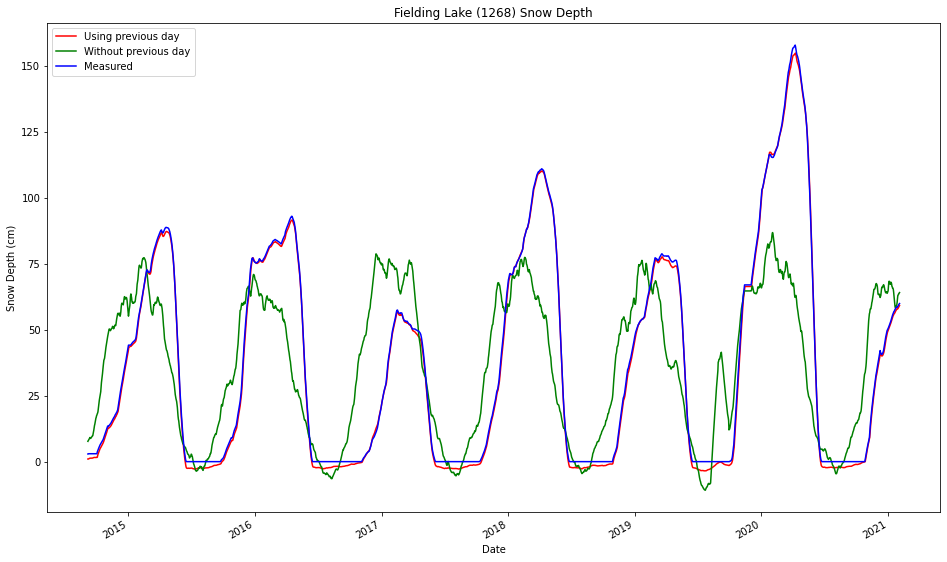

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.plot(time_axis, y_predict_unscaled_s, 'r-', label='Using previous day')
plt.plot(time_axis, y_predict_unscaled_n, 'g-', label='Without previous day')
plt.plot(time_axis, y_train_unscaled, 'b-', label='Measured')
plt.legend()
plt.ylabel('Snow Depth (cm)')
plt.xlabel('Date')
plt.gcf().autofmt_xdate()
plt.title(station_name + ' Snow Depth')

In [11]:
rms_s = mean_squared_error(y_train_unscaled, y_predict_unscaled_s, squared=False)  # Calculating root mean squared error
rms_n = mean_squared_error(y_train_unscaled, y_predict_unscaled_n, squared=False)  # Calculating root mean squared error
print('--------- Using previous snow depth -------------')
print('average rms is ' + str(rms_s))  # Calculating and printing mean rms
print('------- Not using previous snow depth ------------')
print('average rms is ' + str(rms_n))  # Calculating and printing mean rms

--------- Using previous snow depth -------------
average rms is 1.55998308324029
------- Not using previous snow depth ------------
average rms is 29.665895110203465
